In [45]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns


In [35]:

df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [36]:
X = df.iloc[:, :8] 
y = df.iloc[:, 8]   

In [37]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [33]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [34]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

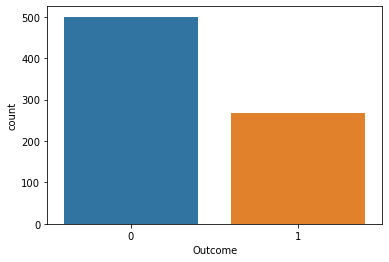

In [46]:
sns.countplot(y)

In [38]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random state = 42)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)  

In [39]:
X_train.shape

(614, 8)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)
print('Predicted : ', y_pred)
print('Actual     :',y_test)

Predicted :  [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0]
Actual     : 668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64


In [42]:
print('Accuracy', accuracy_score(y_test, y_pred)*100,'%')

Accuracy 64.93506493506493 %


In [43]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

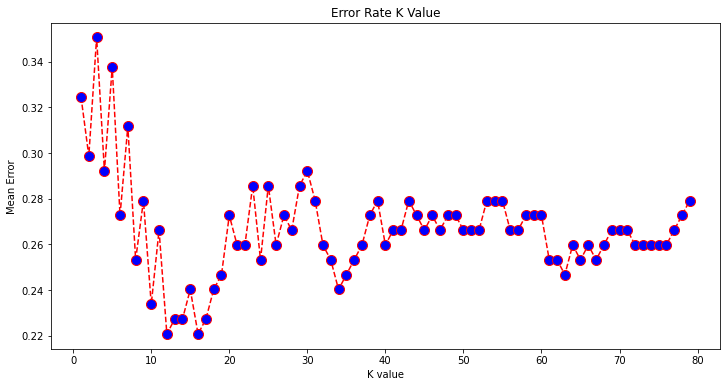

In [54]:
plt.figure(figsize = (12,6))
plt.plot(range(1,80), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [57]:
min_error = min(error)
print('Minimum Error : ' ,min(error))
min_k = error.index(min_error)
print('Best K Value : ' ,min_k+1)

Minimum Error :  0.22077922077922077
Best K Value :  12


In [58]:
print(error[11])

0.22077922077922077
